<a href="https://colab.research.google.com/github/VIVEK818713/Classification/blob/main/1_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree
Decision trees can be used for classification as well as regression problems.

* The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

* Before learning more about decision trees let’s get familiar with some of the terminologies.

**Root Nodes** – It is the node present at the beginning of a decision tree from this node the population starts dividing according to various features.

**Decision Nodes** – the nodes we get after splitting the root nodes are called Decision Node

**Leaf Nodes** – the nodes where further splitting is not possible are called leaf nodes or terminal nodes

**Sub-tree** – just like a small portion of a graph is called sub-graph similarly a sub-section of this decision tree is called sub-tree.

Pruning – is nothing but cutting down some nodes to stop overfitting.

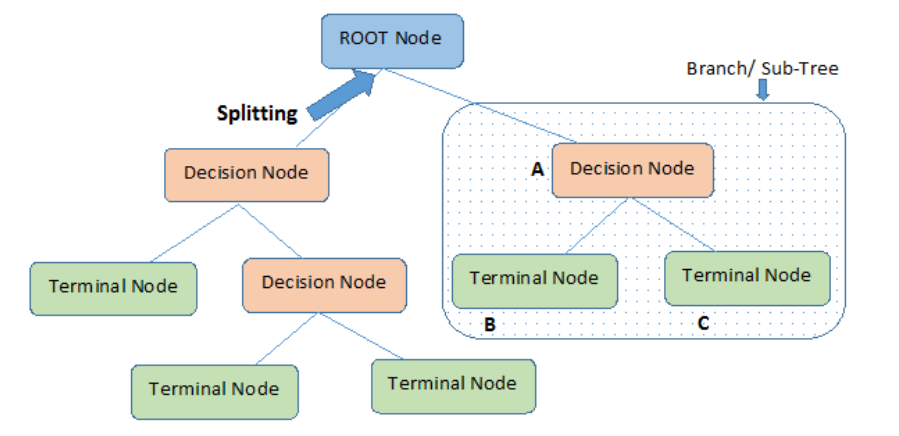

---



---



# Types of Decision Tree
## Regression Tree
A regression tree is used when the dependent variable is continuous. The value obtained by leaf nodes in the training data is the mean response of observation falling in that region. Thus, if an unseen data observation falls in that region, its prediction is made with the mean value. This means that even if the dependent variable in training data was continuous, it will only take discrete values in the test set. A regression tree follows a top-down greedy approach.

## Classification Tree
A classification tree is used when the dependent variable is categorical. The value obtained by leaf nodes in the training data is the mode response of observation falling in that region It follows a top-down greedy approach.

Together they are called as CART(classification and regression tree)

How to create a tree from tabular data? 

which feature should be selected as the root node?
 
on what basis should a node be split?

The decision of making strategic splits heavily affects a tree’s accuracy. The purity of the node should increase with respect to the target variable after each split. The decision tree splits the nodes on all available variables and then selects the split which results in the most homogeneous sub-nodes.

The following are the most commonly used algorithms for splitting

## Gini Impurity

Gini says, if we select two items from a population at random then they must be of the same class and the probability for this is 1 if the population is pure.

It works with the categorical target variable “Success” or “Failure”.

It performs only Binary splits Higher the value of Gini higher the homogeneity.

CART (Classification and Regression Tree) uses the Gini method to create binary splits.

***Steps to Calculate Gini impurity for a split***

* Calculate Gini impurity for sub-nodes, using the formula subtracting the sum of the square of probability for success and failure from one.

***1-(p²+q²)***

where p =P(Success) & q=P(Failure)

* Calculate Gini for split using the weighted Gini score of each node of that split

* Select the feature with the least Gini impurity for the split.

***Gini works only in those scenarios where we have categorical targets. It does not work with continuous targets.***

A very important point to note to keep in mind. For example, if you want to ***predict the house price or the number of bikes*** that have been rented, ***Gini is not the right algorithm***. 

It only performs binary splits either yes or no, success or failure, and so on. 

So it will only split a node into two sub-nodes. These are the properties of Gini impurity.

## 2. Chi-Square
It is an algorithm to find out the statistical significance between the differences between sub-nodes and parent node. We measure it by the sum of squares of standardized differences between observed and expected frequencies of the target variable.

It works with the categorical target variable “Success” or “Failure”.
It can perform two or more splits.

Higher the value of Chi-Square higher the statistical significance of differences between sub-node and Parent node.

Chi-Square of each node is calculated using the formula,

***Chi-square = ((Actual — Expected)² / Expected)¹/2***

It generates a tree called CHAID (Chi-square Automatic Interaction Detector)

***Steps to Calculate Chi-square for a split:***

* Calculate Chi-square for an individual node by calculating the deviation for Success and Failure both

* Calculated Chi-square of Split using Sum of all Chi-square of success and Failure of each node of the split

* Select the split where Chi-Square is maximum.

## 3. Information Gain
A less impure node requires less information to describe it and, a more impure node requires more information. Information theory is a measure to define this degree of disorganization in a system known as Entropy. If the sample is completely homogeneous, then the entropy is zero and if the sample is equally divided (50% — 50%), it has an entropy of one. Entropy is calculated as follows.



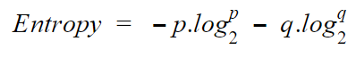

***Steps to calculate entropy for a split:***

* Calculate the entropy of the parent node

* Calculate entropy of each individual node of split and calculate the weighted average of all sub-nodes available in the split. The lesser the entropy, the better it is.

* calculate information gain as follows and chose the node with the highest information gain for splitting

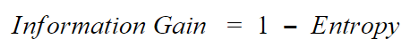

## 4. Reduction in Variance
Till now, we have discussed the algorithms for the categorical target variable. Reduction in variance is an algorithm used for continuous target variables (regression problems).

Used for continuous variables

This algorithm uses the standard formula of variance to choose the best split.

The split with lower variance is selected as the criteria to split the population

***Steps to calculate Variance:***

* Calculate variance for each node.

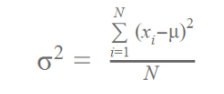

* Calculate variance for each split as a weighted average of each node variance.

* The node with lower variance is selected as the criteria to split.

* The goal of machine learning is to **decrease uncertainty or disorders** from the dataset and for this, we use decision trees.

### Lets do some handson
 * data link  https://www.kaggle.com/kumargh/pimaindiansdiabetescsv
 * you can download data from above link
 * in this data set columns names are not available
 * we can mention it by open that csv and insert a row then add required column name
 * Or you can do it by coding also i am using in notebook

### First import the required librarires

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split    # Import train_test_split function
from sklearn import metrics                           #Import scikit-learn metrics module for accuracy calculation


In [ ]:
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Classification/Decision Tree/pima-indians-diabetes.csv", 
                   )
pima.head()

### if you observe there is no header or no column names
### so we will introduce it

header: this allows you to specify which row will be used as column names for your dataframe. Expected an int value or a list of int values.


Default value is header=0, which means the first row of the CSV file will be treated as column names.

If your file doesn’t have a header, simply set header=None .

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Classification/Decision Tree/pima-indians-diabetes.csv", 
                   header=None, names=col_names)

In [ ]:
pima.head()

After loading the data, we understand the structure & variables, 

### determine the target & feature variables (dependent & independent variables respectively)

In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

### Let’s divide the data into training & testing sets in the ratio of 70:30.

* You can take any ration accordingly
* As a standard practice, you may follow 70:30 to 80:20 as needed.

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Performing The decision tree analysis using scikit learn

In [ ]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

But we should estimate how accurately the classifier predicts the outcome. 

***The accuracy is computed by comparing actual test set values and predicted values.***

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Looks like our decision tree algorithm has an accuracy of 69.26%. A value this high is usually considered good.

### Now that we have created a decision tree, let’s see what it looks like when we visualise it

The Scikit-learn’s export_***graphviz function*** can help visualise the decision tree. We can use this on our Jupyter notebooks. In case you are not using Jupyter, you may want to look at installing the following libraries:

* Graphviz -converts decision tree classifier into dot file
* Pydotplus- convert this dot file to png or displayable form on Jupyter.

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('/content/drive/MyDrive/Colab Notebooks/Classification/Decision Tree/diabetes.png')
Image(graph.create_png())

***You will notice, that in this extensive decision tree chart, each internal node has a decision rule that splits the data.***

***But are all of these useful/pure?***

## Measuring the Impurity of Nodes Created Via Decision Tree Analysis
Gini referred to as Gini ratio measures the impurity of the node in a decision tree. 

One can assume that a node is ***pure*** when all of its records belong to the ***same class.*** 

Such nodes are known as the leaf nodes.



In our outcome above, 

the complete decision tree is difficult to interpret due to the complexity of the outcome. 

***Pruning/shortening a tree is essential to ease our understanding of the outcome and optimise it.***

This optimisation can be done in one of ***three ways:***

### criterion: optional (default=”gini”) or Choose attribute selection measure
* This parameter allows us to use the attribute selection measure.

### splitter: string, optional (default=”best”) or Split Strategy
* Allows the user to split strategy. You may choose “best” to choose the best split or “random” to choose the best random split.

### max_depth: int or None, optional (default=None) or Maximum Depth of a Tree
* This parameter determines the maximum depth of the tree. 
* A higher value of this variable causes overfitting and a lower value causes underfitting.

### check the default value of DecisionTreeClassifier()

In [ ]:
'''(*, criterion="gini",
 splitter="best", 
 max_depth=None, 
 min_samples_split=2, 
 min_samples_leaf=1, 
 min_weight_fraction_leaf=0, 
 max_features=None, 
 random_state=None, 
 max_leaf_nodes=None,
  min_impurity_decrease=0, 
  class_weight=None, 
  ccp_alpha=0)'''

### In our case, we will be varying the maximum depth of the tree as a control variable for pre-pruning. 

***Let’s try max_depth=3.***

In [ ]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


On Pre-pruning, the accuracy of the decision tree algorithm increased to 77.05%, which is clearly better than the previous model.

### Decision Tree Implementation in Python: Visualising Decision Trees in Python

In [ ]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('/content/drive/MyDrive/Colab Notebooks/Classification/Decision Tree/diabetes_entropy.png')
Image(graph.create_png())

The outcome of this pruned model looks easy to interpret. 

With this, we have been able to classify the data & predict if a person has diabetes or not. 

But, decision tree is not the only clustering technique that you can use to extract this information, 

there are various other methods that you can explore.

## Problem 2 on Decision Tree

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification/titanic.csv')
df.head(2)


In [ ]:
df.shape

In [ ]:
new_df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [ ]:
new_df.isnull().sum()

In [ ]:
new_df=new_df.dropna()

In [ ]:
new_df.isnull().sum()

In [ ]:
new_df.head(2)

In [ ]:
new_df=pd.get_dummies(new_df,drop_first=True)

In [ ]:
new_df.head(2)

In [ ]:
new_df.shape

In [ ]:
X=new_df.drop(['Survived'],axis=1)
y=new_df['Survived']

In [ ]:
X_train,X_test,y_tarin,y_test=train_test_split(X,y,test_size=0.25,random_state=11)

In [ ]:
X_train

In [ ]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [ ]:
dc=DecisionTreeClassifier(random_state=10)

In [ ]:
dc.fit(X_train,y_tarin)

In [ ]:
dc.score(X_test,y_test)

In [ ]:
dc.score(X_train,y_tarin)

In [ ]:
y_pred=dc.predict(X_test)

In [ ]:
y_pred

## for checking the probabilty

In [ ]:
dc.predict_proba(X_test)

In [ ]:
prob_thresold=dc.predict_proba(X_test)[:,1]

In [ ]:
new_thersold=[]
for i in range(len(prob_thresold)):
  if prob_thresold[i] <0.6:
    new_thersold.append(0)
  else:
    new_thersold.append(1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,new_thersold)

## Changing the depth

In [ ]:
train_accuracy=[]
test_accuracy=[]
for depth in range(1,10):
  dc=DecisionTreeClassifier(max_depth=depth,random_state=10)
  dc.fit(X_train,y_tarin)
  train_accuracy.append(dc.score(X_train,y_tarin))
  test_accuracy.append(dc.score(X_test,y_test))

In [ ]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,'test_acc':test_accuracy})
frame

# Now print the plot

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(frame['max_depth'],frame['train_acc'],marker='o')
plt.plot(frame['max_depth'],frame['test_acc'],marker='o')
plt.xlabel('Depth of tree')
plt.ylabel("performance")
plt.show()

## insert new parameter in model

In [ ]:
dc=DecisionTreeClassifier(max_depth=7,max_leaf_nodes=25,random_state=10)

In [ ]:
dc.fit(X_train,y_tarin)

In [ ]:
dc.score(X_train,y_tarin)

In [ ]:
dc.score(X_test,y_test)

## Draw the tree
### for this use pip install graphviz

In [ ]:
pip install graphviz

In [ ]:
from sklearn import tree

In [ ]:
X_train

In [ ]:
decision_tree=tree.export_graphviz(dc,out_file='tree.dot',feature_names=X_train.columns,max_depth=3,filled=True,)

In [ ]:
! dot -Tpng tree.dot -o tree.png

In [ ]:
image=plt.imread('tree.png')
plt.figure(figsize=(12,12))
plt.imshow(image)

The outcome of this pruned model looks easy to interpret. With this, we have been able to classify the data & predict if a person has diabetes or not. But, decision tree is not the only clustering technique that you can use to extract this information, there are various other methods that you can explore.